# Exponenetial Distrbution 

In [4]:
# Import Necessary Packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'f(x)')

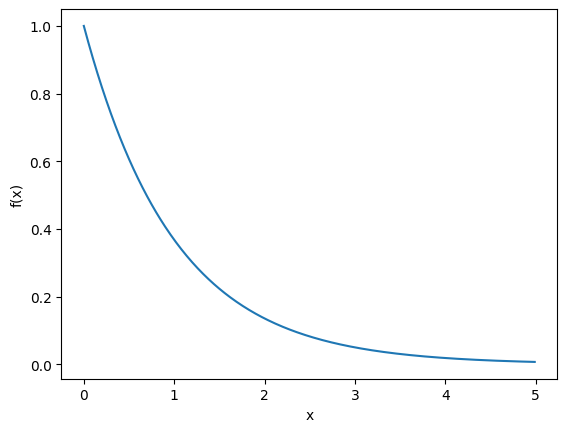

In [5]:
x = np.arange(0, 5, 0.01)
plt.plot(x, np.exp(-x));
plt.xlabel("x")
plt.ylabel("f(x)")

# Laplace Distribution 

In [6]:
def simple_laplace(x):
    return np.exp(-np.abs(x))

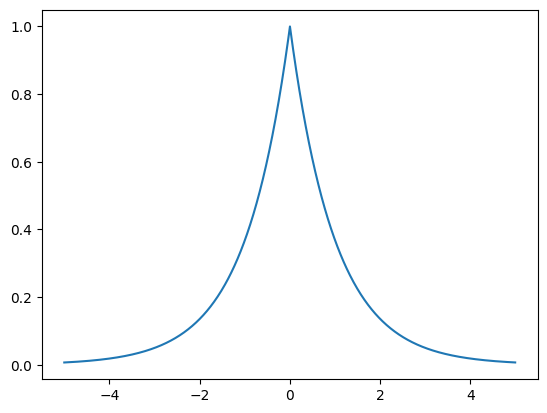

In [7]:
x = np.arange(-5, 5, 0.01)
plt.plot(x, simple_laplace(x));

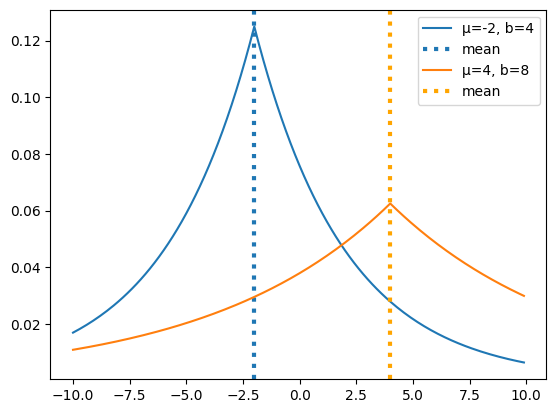

In [13]:
def laplace_dist(x, μ, b):
    return 1 / (2 * b) * np.exp(-np.abs(x - μ) / b)


def plot_laplace_dist(x, μ, b):

    plt.plot(x, laplace_dist(x, μ, b),
    label="μ={}, b={}".format(μ, b))


x = np.arange(-10, 10, 0.1)

plot_laplace_dist(x, -2, 4)

plt.axvline(x=-2, linestyle='dotted', linewidth=3, label='mean')

plot_laplace_dist(x, 4, 8)

plt.axvline(x=4, color='orange', linestyle='dotted', linewidth=3, label='mean')

plt.legend();


In [14]:
reported_value = 100
ε = 0.5

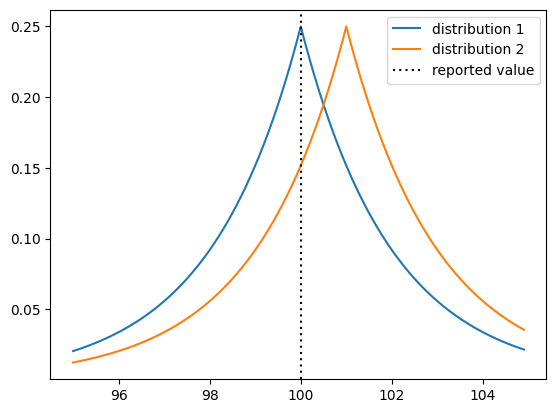

In [15]:
x = np.arange(95, 105, 0.1)
dist1 = laplace(x, reported_value, 1 / ε)
dist2 = laplace(x, reported_value + 1, 1 / ε)
plt.plot(x, dist1, label="distribution 1")
plt.plot(x, dist2, label="distribution 2")
plt.axvline(x=reported_value, c="black", dashes=(1, 2), label="reported value")
plt.legend()

In [16]:
p1 = laplace(reported_value, reported_value, 1 / ε)
p2 = laplace(reported_value, reported_value + 1, 1 / ε)
p1, p2

(0.25, 0.15163266492815836)

In [17]:
p1, p2 * np.exp(ε)

(0.25, 0.25)

# Guasian Distribution

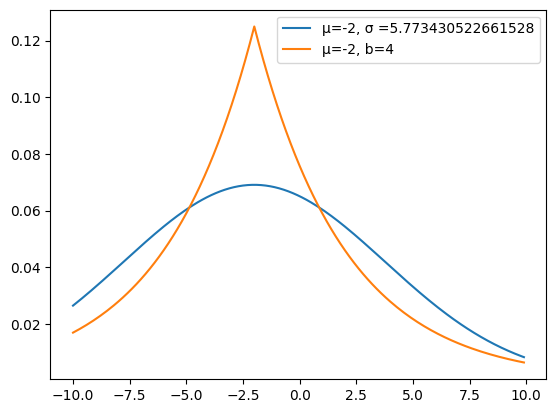

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def guissan_dist(x, μ, σ):

    return (1/(σ * np.sqrt(2 * np.pi)) * np.exp(-(x - μ)**2 / (2 * σ**2)))

def plot_guissan(x, μ, σ ):
    plt.plot(x, guissan_dist(x, μ, σ), 
    label="μ={}, σ ={}".format(μ, σ ))
    
x = np.arange(-10, 10, 0.1)

stdv=np.std(x)

plot_guissan(x, -2, stdv)

plot_laplace_dist(x,-2,4)

plt.legend()


In [19]:
query_result=100

p1 = guissan_dist(query_result, query_result, 1 / ε)

p2 = guissan_dist(query_result, query_result+1, 1 / ε)

print(p1,p2)

#0.19947114020071635 0.17603266338214976

p1, p2 * np.exp(ε)

#0.19947114020071635, 0.29022879645614585


0.19947114020071635 0.17603266338214976


(0.19947114020071635, 0.29022879645614585)

# sensitivity

In [20]:
def f(x):
    return x ** 3

def sensitivity(f, xa, xb):
    sensitivity = abs(f(xa) - f(xb))
    return sensitivity

# Sensitivity calculation for the input range 0 to 6 and summing the sensitivities
total_sensitivity = 0

for x in range(6):
    xa = x
    xb = x + 1
    sensitivity_value = sensitivity(f, xa, xb)
    print(sensitivity_value)
    total_sensitivity += sensitivity_value

print("Total Sensitivity within the range 0 to 6:", total_sensitivity)

1
7
19
37
61
91
Total Sensitivity within the range 0 to 6: 216


# Count Queries using DP

In [14]:
import numpy as np
Total_employees = 4
sensitivity = 1
print("sensitivity:",sensitivity )
# epsilon =privacy loss or budget
epsilon= 0.8
noise = np.random.laplace(loc=0, scale=sensitivity/epsilon)
print("noise:",noise)
count_employee_dp = Total_employees + noise
print ("count with DP:", count_employee_dp)


sensitivity: 1
noise: -1.5326390269054087
count with DP: 2.4673609730945913


# Sum Queries 

In [8]:
import numpy as np
Total_salary = 1400
Lower_bound=200
Upper_bound=500
sensitivity = Upper_bound - Lower_bound
# epsilon =privacy loss or budget
print("sensitivity:",sensitivity )
epsilon= 0.9
noise = np.random.laplace(loc=0, scale=sensitivity/epsilon)
print("noise:",noise)
Total_salary_dp = Total_salary + noise
print ("total salary with DP:",Total_salary_dp)


sensitivity: 300
noise: 518.9972965605555
total salary with DP: 1918.9972965605555


In [15]:
Total_salary = 1400
Lower_bound=100
Upper_bound=9999
sensitivity = Upper_bound - Lower_bound
print("sensitivity:",sensitivity )
# epsilon =privacy loss or budget
epsilon= 0.9
noise = np.random.laplace(loc=0, scale=sensitivity/epsilon)
print("noise:",noise)
Total_salary_dp = Total_salary + noise
print ("total salary with DP:",Total_salary_dp)


sensitivity: 9899
noise: 4724.329480136737
total salary with DP: 6124.329480136737


# Average Queries

In [18]:
import numpy as np
Total_employees = 4
sensitivity = 1
print("sensitivity:",sensitivity )
# epsilon =privacy loss or budget
epsilon= 0.8
noise = np.random.laplace(loc=0, scale=sensitivity/epsilon)
print("noise:",noise)
count_employee_dp = Total_employees + noise
print ("count with DP:", count_employee_dp)

sensitivity: 1
noise: 2.247932787995729
count with DP: 6.24793278799573


In [20]:
Average_salary = 350
Total_salary_dp = 6124.329480136737
count_dp = 6.24793278799573
dp_average = (Total_salary_dp)/count_dp
dp_average

980.2169274137402

# Clipping

In [4]:
import pandas as pd
data = {'age': [32, 44, 55, 66], 'salary': [200, 300, 400, 500]}
df = pd.DataFrame(data)
df['salary'].clip(lower=0, upper=999)

0    200
1    300
2    400
3    500
Name: salary, dtype: int64

In [20]:
import pandas as pd
data = {'age': [32, 44, 55, 66], 'salary': [200, 300, 400, 500]}
df = pd.DataFrame(data)
df['salary'].clip(lower=250, upper=400)

0    250
1    300
2    400
3    400
Name: salary, dtype: int64

In [24]:
import pandas as pd
data = {'age': [32, 44, 55, 66], 'salary': [200, 300, 400, 500]}
df = pd.DataFrame(data)
df['salary'].sum()

1400

In [34]:
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)

epsilon = 0.9
sensitivity=400-100

print(laplace_mech(df['salary'].clip(lower=100, upper=500).sum(),sensitivity,epsilon))
print(laplace_mech(df['salary'].sum(),sensitivity,epsilon))

1693.8114539575836
1793.7575175454226


/var/folders/61/3x6_zr2n5nd67km655rj4nd4r4gmsb/T/ipykernel_66877/3358688344.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


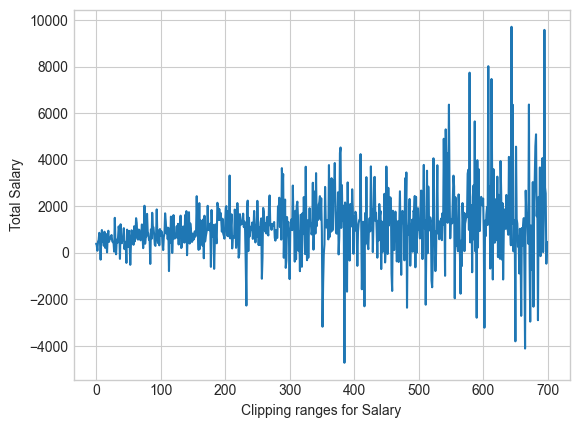

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

data = {'age': [32, 44, 55,66], 'salary': [200, 300, 400, 500]}
df = pd.DataFrame(data)
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)

epsilon = 0.5

plt.plot([laplace_mech(df['salary'].clip(lower=0, upper=i).sum(), i, epsilon) for i in range(100,800)])
plt.xlabel('Clipping ranges for Salary')
plt.ylabel('Total Salary');

/var/folders/61/3x6_zr2n5nd67km655rj4nd4r4gmsb/T/ipykernel_66877/1691243237.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


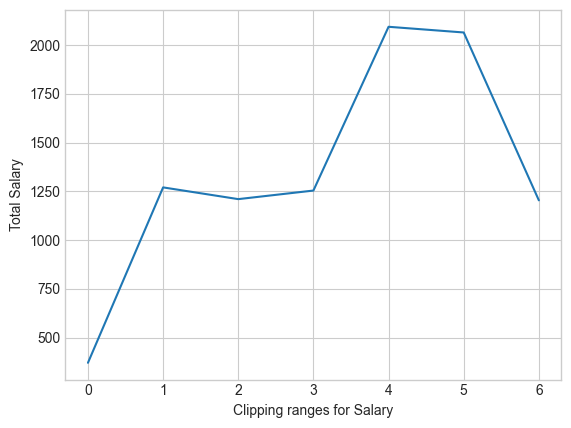

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

data = {'age': [32, 44, 55,66], 'salary': [200, 300, 400, 500]}
df = pd.DataFrame(data)
def laplace_mech(queryresult, sensitivity, epsilon):
    return queryresult + np.random.laplace(loc=0, scale=sensitivity/epsilon)

epsilon = 0.5


plt.plot([laplace_mech(df['salary'].clip(lower=0, upper=i).sum(), i, epsilon) for i in range(100,800,100)])
plt.xlabel('Clipping ranges for Salary')
plt.ylabel('Total Salary');